In [1]:
from Segmentation_methods.Dataset.Custom import Custom
from Segmentation_methods.utils import show_sample
from dotenv import load_dotenv
import os
import torch
import pickle
from sklearn.model_selection import train_test_split

# 1) Split, Visualize and prepare data for training 

In [2]:
load_dotenv(dotenv_path=".env")
WORKDIR = os.getenv("WORKDIR")
# Get paths from env variables
images_path = os.getenv("IMAGES_PATH")
masks_path = os.getenv("MASKS_PATH")

In [3]:
# Load the original data
with open(images_path, "rb") as f:
    X = pickle.load(f)

with open(masks_path, "rb") as f:
    Y = pickle.load(f)

print("Original shape:", X.shape, Y.shape)

# Split (same shuffle)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Directory to save the splits
save_dir = os.path.join(WORKDIR, "Segmentation_methods", "Dataset", "Splits")
os.makedirs(save_dir, exist_ok=True)

with open(os.path.join(save_dir, "X_train.pkl"), "wb") as f:
    pickle.dump(X_train, f)

with open(os.path.join(save_dir, "X_test.pkl"), "wb") as f:
    pickle.dump(X_test, f)

with open(os.path.join(save_dir, "Y_train.pkl"), "wb") as f:
    pickle.dump(Y_train, f)

with open(os.path.join(save_dir, "Y_test.pkl"), "wb") as f:
    pickle.dump(Y_test, f)

print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape:", X_test.shape, Y_test.shape)

Original shape: (5481, 128, 128, 3) (5481, 128, 128, 3)
Train shape: (4384, 128, 128, 3) (4384, 128, 128, 3)
Test shape: (1097, 128, 128, 3) (1097, 128, 128, 3)


In [4]:
images_train = os.path.join(WORKDIR, "Segmentation_methods", "Dataset", "Splits", "X_train.pkl")
masks_train = os.path.join(WORKDIR, "Segmentation_methods", "Dataset", "Splits", "Y_train.pkl")
Training_dataset = Custom(image_pkl_path=images_train, mask_pkl_path=masks_train)

images_test = os.path.join(WORKDIR, "Segmentation_methods", "Dataset", "Splits", "X_test.pkl")
masks_test = os.path.join(WORKDIR, "Segmentation_methods", "Dataset", "Splits", "Y_test.pkl")
Training_dataset = Custom(image_pkl_path=images_test, mask_pkl_path=masks_test)

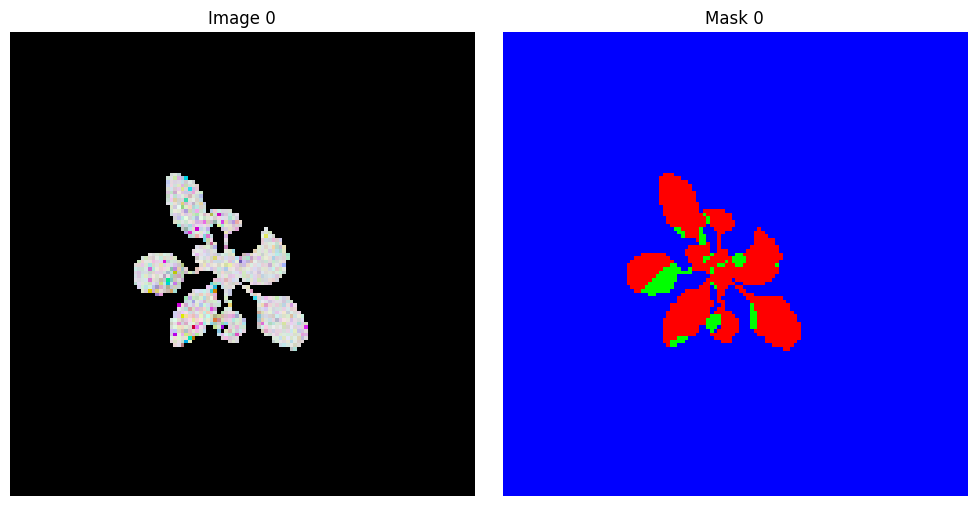

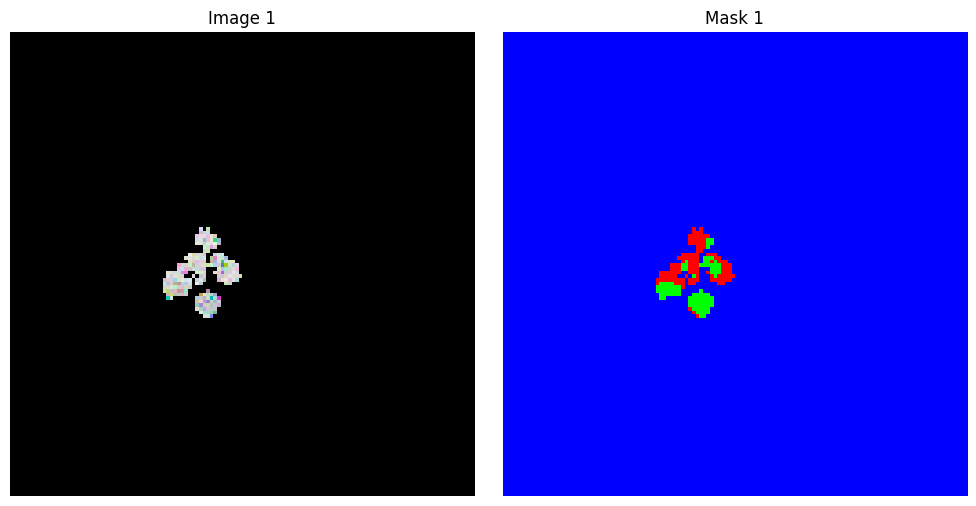

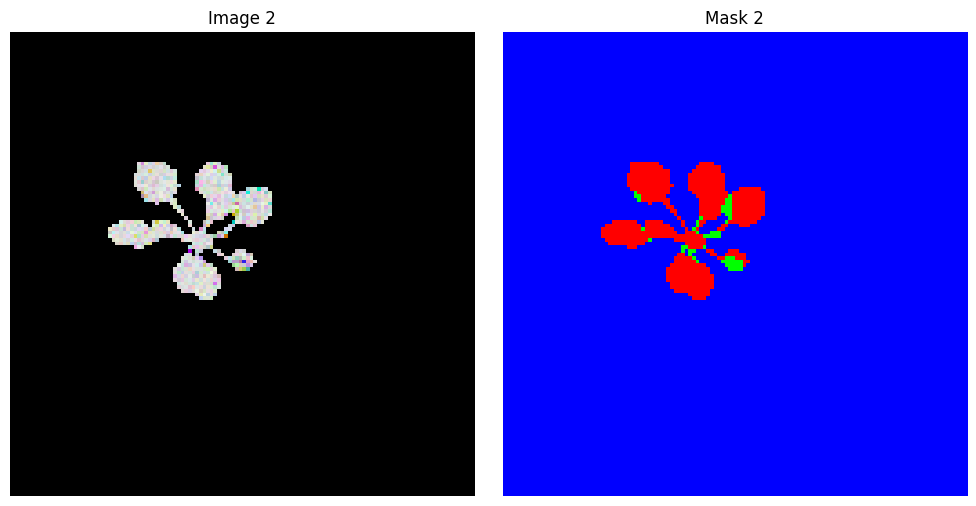

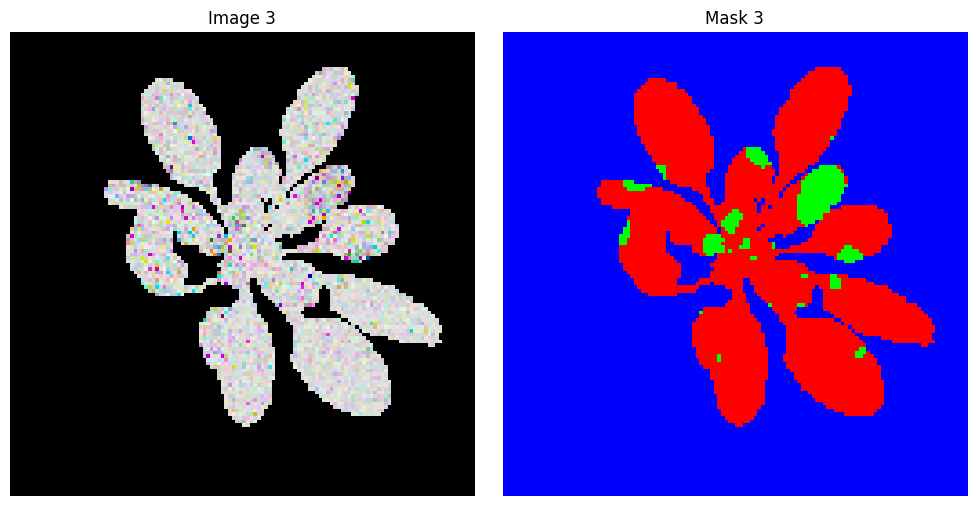

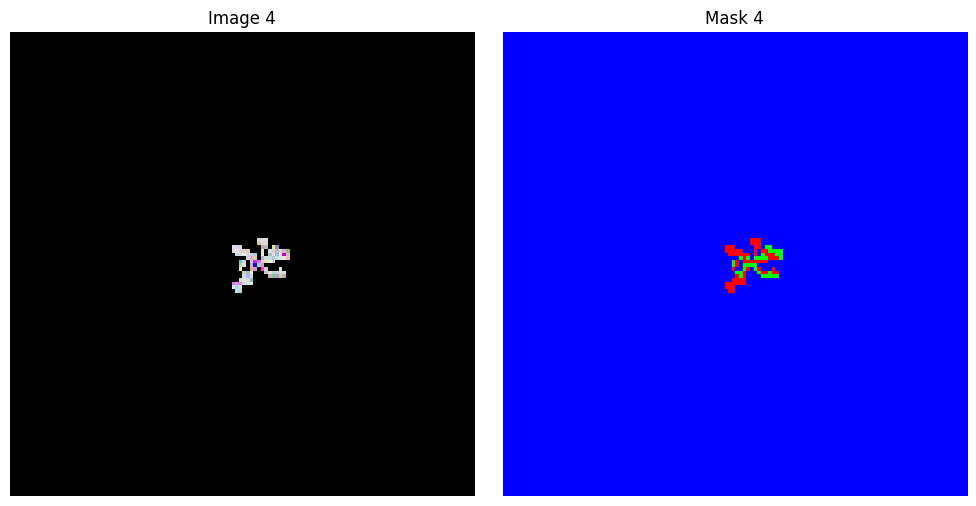

In [5]:
for i in range(5):
    image, mask_rgb, _ = Training_dataset[i]
    show_sample(image, mask_rgb, index=i)